# Predicting Airbnb Listing Prices in Paris  
*Using machine learning to understand key pricing drivers*

## 1. Business Understanding

<div style="text-align: center;">
  <img src="../illustration-images/images.png" width="610" style="display:inline-block; margin-right: 20px;">
  <img src="../illustration-images/paris.jpg" width="340" style="display:inline-block;">
</div>

### 1.1 Business Objectives

Predicting Airbnb listing prices and understanding the most influential features can be highly beneficial to stakeholders.
Renters want proposed prices for accommodations to be attractive, while hosts, seeking profit, want fair pricing guidance without feeling shortchanged. Ultimately, both parties aim for a fair price based on the apartment's characteristics and location.

The goal of this project is to develop a *supervised machine learning* model to:

* **Understand** the impact of individual features typically found in listings.
* **Predict** accurate prices based on the characteristics of the apartment.

To carry out this project, we will use Airbnb listing prices data in the city of **Paris** from the past 12 months. Using this dataset, we will train a machine learning model, analyze feature importance, and ultimately deploy the model into production as web app.

<div style='text-align: center;'>
    <img src='../illustration-images/diagram-pipeline.png' width="600">
</div>

This project will interest and benefit the following stakeholders:

* **Renters**: The model will help renters assess whether the listed price is fair by comparing it to the predicted price. For price-sensitive renters, it also offers insight into which features to prioritize or compromise on to stay within their budget.
* **Hosts**: Setting a fair and competitive price can be challenging, especially for new hosts. Our model will assist them by offering data-driven price suggestions based on similar apartments. It can also help hosts identify which features to highlight or improve to increase the value of their listing.

### 1.2. Business Success Criteria

In the scope of this project, we aim to achieve the following:

* **Low RMSE**: We will use the Root Mean Square Error (RMSE) to evaluate the model's performance. Our target is an RMSE below €50, indicating that price estimates are reasonably close to actual values.
* **Identified key features**: At the end of the project, we aim to clearly identify the most important features that influence pricing.
* **Lightweight model**: The final model should be as lightweight as possible to enable fast and efficient deployment.




## 2. Data Understanding

### 2.1. Collecting Initial data

The dataset used in this project was sourced from [Inside Airbnb](https://insideairbnb.com/fr/get-the-data/), a platform that provides publicly available Airbnb data for various cities.

For this analysis, we downloaded the Paris listings dataset dated March 3, 2025.

According to Inside Airbnb, the following information is important to note:

- The data is collected from publicly available information on the Airbnb website.

- It has been verified, cleansed, and aggregated by Inside Airbnb.

- The reported location of each listing is obfuscated for privacy reasons, with coordinates randomly displaced within a radius of approximately 150 meters (450 feet) from the actual address.

- Listings within the same building are anonymized individually, which can make them appear scattered on the map.

For further details and assumptions regarding the data collection process, refer to the official [Inside Airbnb Data Assumptions](https://insideairbnb.com/fr/data-assumptions/) page.

In [22]:
#  importing important libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
#adding ./src to the python path
import sys
sys.path.append('../src')
# to reload module in src/ if necessary
import importlib

The dataset is of csv format, so we will use pandas csv reader to load the dataset.

In [ ]:
raw_data = pd.read_csv('../data/listings.csv')

According to the Inside Airbnb website, the dataset contains **86,064 listings and 79 attributes** for the city of Paris.

Detailed descriptions of all Airbnb listing attributes can be found [here](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?gid=1322284596#gid=1322284596). Among these, the following features appear to be the most promising for our analysis:

| Attributes | Type| Description |
|------------|-----|-------------|
| neighbourhood_cleansed |  text | The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles. |
| neighbourhood_group_cleansed | Text | The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles. |
| latitude | numeric | Uses the World Geodetic System (WGS84) projection for latitude and longitude.|
| longitude | numeric | Uses the World Geodetic System (WGS84) projection for latitude and longitude.|
| property_type | text | Self selected property type. Hotels and Bed and Breakfasts are described as such by their hosts in this field |
| room_type | text | Entire home/aptP rivate room/Shared room/Hotel. All homes are grouped into the following three room types: Entire place, Private room, Shared room, Entire place [(see)](https://www.airbnb.com/help/article/5/what-does-the-room-type-of-a-listing-mean)|
| accommodates | integer | The maximum capacity of the listing |
| bathrooms | numeric | The number of bathrooms in the listing|
| bathrooms_text | string | The number of bathrooms in the listing. 
On the Airbnb web-site, the bathrooms field has evolved from a number to a textual description. For older scrapes, bathrooms is used. |
| bedrooms | integer| The number of bedrooms |
| beds | integer | The number of bed(s)|
| amenities          | JSON      | List of facilities provided in the listing    |
| `price` | currency | daily price in local currency.|
| minimum_nights | integer | minimum number of night stay for the listing (calendar rules may be different) |
| maximum_nights | integer | maximum number of night stay for the listing (calendar rules may be different) |

**Some additional features may have a significant impact on the price, and we will explore them further during the data preparation phase.**

While host-related information may influence a customer's decision to book, it should not directly impact the listing price. Therefore, features such as `host_response_rate`, `host_acceptance_rate`, `host_name`, `host_since`, etc., **appear to be irrelevant** for price prediction. However, we will not exclude them systematically; the final decision will be based on correlation analysis and feature importance evaluations.

The dataset is sufficiently large to train accurate predictive models. However, it's important to note that **price trends may evolve over time** due to changing economic or societal conditions.

Lastly, the dataset provides a **rich set of attributes**, which should be adequate for our modeling objectives.

Other attributes may worth-mensioning:
- `id`: (integer) Airbnb's unique identifier for the listing
- `host_id`: (integer) Airbnb's unique identifier for the host/user


### 2.2 Describing the Data

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86064 entries, 0 to 86063
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            86064 non-null  int64  
 1   listing_url                                   86064 non-null  object 
 2   scrape_id                                     86064 non-null  int64  
 3   last_scraped                                  86064 non-null  object 
 4   source                                        86064 non-null  object 
 5   name                                          86064 non-null  object 
 6   description                                   83159 non-null  object 
 7   neighborhood_overview                         42511 non-null  object 
 8   picture_url                                   86063 non-null  object 
 9   host_id                                       86064 non-null 

In [ ]:
#count the number of duplicated listings
raw_data.duplicated(['id']).sum()

0

In [ ]:
print(f'There are {100 * raw_data.isnull().sum().sum() / np.product(raw_data.shape):2.0f}% of missing data.')

There are 13% of missing data


In [33]:
print(f'target variable has {raw_data.price.isna().mean() * 100 :2.0f}% missing value')

target variable has 35% missing value


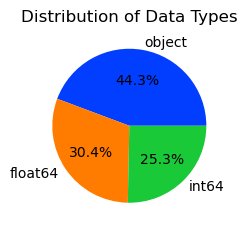

In [10]:
from plot import PlotData

plot=PlotData()
plot.dtypes(raw_data.dtypes.value_counts(), figsize=(2.5, 2.5))
#importlib.reload(PlotData)

As expected there are 86064 entries in the dataset, and index range from 0 to 86063. There are 79 columns in the dataset.
The dataset contains both numeric and categorical data. While the latter represent approximately 44% of the data, 56% of data are numerical (30.4% of type `float64` and 25.4% `int64`). The dataset has 13% of missing entries. No duplicated listing is present in the dataset. 

Two attributes `calendar_updated` and `neighbourhood_group_cleansed`, both of type `float64` are empty.

`price`, the target variable is reported to be of type `object`. For further analysis this column must me converted into `float64`, which is the desired type for such quantity.

This conversion should be performed in removing the '$' sign and the "," before applying pandas `.astype('float')`.
We also notice 35% of its values missing. Let's verify if there is any association between missingness and any other observable.

In [45]:
(raw_data['price']=='$100.00').mean()*100

0.9214073247815578

### 2.3. Exploring Data

### 2.4. Verifying Data Quality

### 2.5. Summary